## Import libraries


In [2]:
import pandas as pd
from gensim.models import Word2Vec
import numpy as np
import re
import nltk
#nltk.download('punkt')
from nltk.tokenize import word_tokenize  
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer as tfidf
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score as sc
import tensorflow as tf
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances as p_dist

In [1]:
!pip install wrapt --upgrade --ignore-installed
!pip install tensorflow

## Explore data

In [3]:
#pd.set_option('display.max_columns',None)
df = pd.read_csv("C:/Users/Gunisha Chaturvedi/Dropbox/My PC (LAPTOP-1CT80JS5)/Documents/minor/WDIEXCEL2.csv")
df.head()

,Country_Name,Country Code,Indicator_Name,Indicator_Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,82.783289,83.120303,83.533457,83.897596,84.171599,84.510171,NaN,NaN,NaN,NaN
1,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,87.199474,87.512260,88.129881,87.275323,88.720097,89.308602,90.283638,89.286856,NaN,NaN
2,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,75.958878,77.251714,78.165706,75.512153,78.211000,79.065508,81.102134,79.248100,NaN,NaN
3,Arab World,ARB,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,96.466418,96.435957,96.772853,96.466705,96.936319,97.290083,97.467915,97.063959,NaN,NaN
4,Arab World,ARB,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,22.260538,NaN,NaN,30.277130,NaN,NaN,37.165211,NaN,NaN,NaN


In [3]:
print("Shape:",df.shape)

#get unique indicator values
indi_unique = len(list(df.Indicator_Name.unique()))
print("Unique indicators:",indi_unique)

#get unique indicator names
country_unique = len(list(df.Country_Name.unique()))
print("Unique countries:",country_unique)

#frequency of each unique indicator
print("Frequency of each indicator:",df['Indicator_Name'].value_counts())

Shape: (132948, 65)
Unique indicators: 1440
Unique countries: 133
Frequency of each indicator: Agricultural methane emissions (thousand metric tons of CO2 equivalent)                                                   133
Rural population                                                                                                          133
Renewable electricity output (% of total electricity output)                                                              133
Population, total                                                                                                         133
Rural population (% of total population)                                                                                  133
People practicing open defecation (% of population)                                                                       133
Land area (sq. km)                                                                                                        133
Nitrous oxide emissions

### It can be concluded that the distribution of indicators is uneven because some rows have been removed from the original dataset as a part of cleaning.

## Clean data 

In [3]:
#check for rows which have null values for all years 
df1=df[df.loc[:,'1960':'2020'].isnull().all(axis=1)]

#get column wise sum of null values
print(df.isnull().sum().sort_values(ascending=False))

#remove those rows
df.drop(list(df1.index),inplace=True)
print(df.shape)
df.to_csv('C:/Users/hp1/Documents/minor/WDIEXCEL2.csv')

In [4]:
def clean_data(df_new):
    stop_words = set(stopwords.words('english'))
    for i in range(0,df_new.size):
        df_new[i]=re.sub('\(.*?\)',"",df_new[i])        #remove content within brackets
        df_new[i] = re.sub(r'[^\w\s]',"", df_new[i])    #remove punctuations
        df_new[i]= re.sub('\d',"",df_new[i])           #remove numbers
        word_tokens = word_tokenize(df_new[i])
        df_new[i]=" ".join(filter(lambda x: x not in stop_words , word_tokens))   #remove stop words
    return df_new

In [5]:
unique_indicators = df.Indicator_Name.unique()
unique_indicators = clean_data (unique_indicators)
unique_indicators

array(['Access clean fuels technologies cooking', 'Access electricity',
       'Access electricity rural', ..., 'Net ODA provided total',
       'Net primary income', 'Female genital mutilation prevalence'],
      dtype=object)

### Trying word2vec on data

In [3]:
text_data = unique_indicators.tolist()

In [4]:
def convert (text_data):
    for i in range (0,len(text_data)):
        text_data[i] = text_data[i].split()
    return text_data
text_data = convert (text_data)

In [8]:
model = Word2Vec(text_data, min_count=1, size=4)

In [9]:
model.save('model1')

In [65]:
len(model.wv.vocab)

1127

In [14]:
model.wv.most_similar ('government')

[('Suicide', 0.9895569086074829),
 ('documentary', 0.9814968109130859),
 ('Survival', 0.9715716242790222),
 ('UNRWA', 0.9706627726554871),
 ('loans', 0.968593955039978),
 ('Imports', 0.9677640199661255),
 ('Gross', 0.957078218460083),
 ('shipments', 0.9545134902000427),
 ('Market', 0.9509927034378052),
 ('food', 0.9504662752151489)]

In [12]:
model.wv['Access']

array([ 0.064179  ,  0.03314259, -0.00698101, -0.02683746], dtype=float32)

## Vectorisation

In [6]:
#apply tf-idf vectorization

v = tfidf()
v1 = v.fit_transform(unique_indicators)
arr = v1.toarray()

## PCA and k-means

In [7]:
pca = PCA (n_components=2)
pcom = pca.fit_transform(arr)
principaldf = pd.DataFrame(data = pcom, columns = ['x', 'y'])
principaldf.head()

,x,y
0,-0.053093,-0.003928
1,-0.058078,-0.005259
2,-0.052967,-0.004277
3,-0.051594,-0.003552
4,-0.067034,0.024567


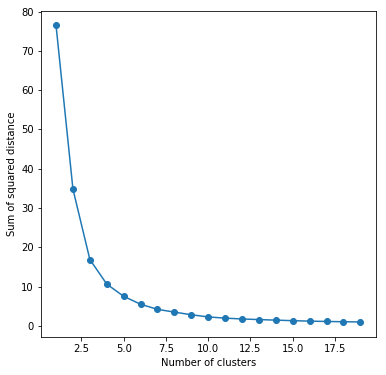

In [8]:
#implement elbow method

sse = []
list_k = list(range(1, 20))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(principaldf)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters')
plt.ylabel('Sum of squared distance');

In [9]:
#apply k-means

Kmean = KMeans (n_clusters = 5,random_state=0)
cluster=Kmean.fit_predict (principaldf)

In [12]:
cluster = pd.Series(cluster)

In [22]:
df2 = pd.concat([df.loc[0:1439,'Indicator_Name'], cluster], axis=1)

In [24]:
df2.tail()

,Indicator_Name,0
1435,"Personal remittances, received (current US$)",4
1436,"Personal transfers, receipts (BoP, current US$)",4
1437,"Physicians (per 1,000 people)",4
1438,"Plant species (higher), threatened",4
1439,"PM2.5 air pollution, mean annual exposure (mic...",3


In [28]:
df2.to_csv('C:\\Users\\Gunisha Chaturvedi\\Dropbox\\My PC (LAPTOP-1CT80JS5)\\Documents\\minor\\newclusters.csv')

In [25]:
new_df = pd.concat([principaldf,cluster], axis=1)
new_df.rename(columns={0:'Cluster'},inplace=True)
new_df.head()

,x,y,Cluster
0,-0.053093,-0.003928,0
1,-0.058078,-0.005259,0
2,-0.052967,-0.004277,0
3,-0.051594,-0.003552,0
4,-0.067034,0.024567,0


In [30]:
cluster.head(20)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    4
17    4
18    4
19    4
dtype: int32

In [47]:
unique_indicators_df = pd.DataFrame (unique_indicators, columns= ['Indicator_Name'])

In [52]:
df_final = pd.concat ([unique_indicators_df, new_df], axis=1)

In [55]:
df_final.head()

,Indicator_Name,x,y,Cluster
0,Access clean fuels technologies cooking,-0.053096,-0.003290,1
1,Access electricity,-0.058083,-0.004177,1
2,Access electricity rural,-0.052971,-0.002681,1
3,Access electricity urban,-0.051598,-0.001911,1
4,Account ownership financial institution mobile...,-0.067046,0.026517,1


## Evaluation metrics- Dunn Index and Silhouette Score

In [58]:
#code to calculate numerator
#calculate pairwise distances between cluster centers

centers = Kmean.cluster_centers_
d_mat = p_dist(centers, metric= 'euclidean')

#remove duplicates and get min distance
d_mat_unique = set(d_mat.flatten()) 
d_mat_unique.remove(0)
inter_cluster_dist = min(d_mat_unique)

In [60]:
#code to calculate denominator

dist_list = []
n_clusters = 5
for j in range(0,n_clusters):
    cluster_points = df_final[['x','y']][df_final['Cluster']== j]
    dist_mat = p_dist (cluster_points)
    dist_mat_unique = set(dist_mat.flatten()) 
    max1 = max(dist_mat_unique)
    dist_list.append (max1)

intra_cluster_dist = max(dist_list)
d_index = (inter_cluster_dist/intra_cluster_dist)
print (d_index)

0.39687119734012266


In [61]:
#calculate silhouette score
print(sc(principaldf,cluster))

0.6411448775523271


## Visualize clusters

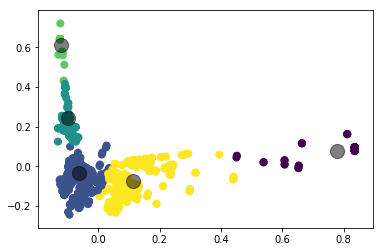

In [62]:
plt.scatter(df_final['x'], df_final['y'], c=cluster, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## Visualisations

In [ ]:
#stacked bar graph

df1=df.where((df['Indicator_Code']=='SL.TLF.0714.WK.ZS') | (df['Indicator_Code']=='SL.TLF.0714.SW.ZS'))
df1.dropna(how='all',inplace=True)
print(df1.shape)
print(df1.head(10))
df1.to_csv('C:/Users/hp1/Documents/minor/education1.csv')